In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from LinearDiscriminantAnalysis import LDA_implemented
from NaiveBayes import NB_clf

from tqdm import tqdm

In [2]:

train_data = np.load("data/fashion_train.npy")
X_train, y_train = train_data[:,:784], train_data[:,-1]

test_data = np.load("data/fashion_test.npy")
X_test, y_test = test_data[:,:784], test_data[:,-1]

N_CLASSES = len(np.unique(y_train))
CLOTHING_TYPES = {0: "T-shirt/top", 
                  1: "Trouser",
                  2: "Pullover",
                  3: "Dress",
                  4: "Shirt"}


In [3]:
# PCA 

num_components = 6
pca = PCA(n_components=num_components)

# Standardizing each feature to have mean 0 and variance 1 both for the training and test set
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Fitting the PCA model on the training data and transform it
PCA_X_train = pca.fit_transform(X_train_standardized)
PCA_X_test = pca.transform(X_test_standardized)

In [4]:
# LDA
lda = LDA_implemented(N_CLASSES-1)
LDA_X_train = lda.fit_transform(X_train, y_train)
LDA_X_test = lda.transform(X_test)

LDA succesfully fitted and tranformed


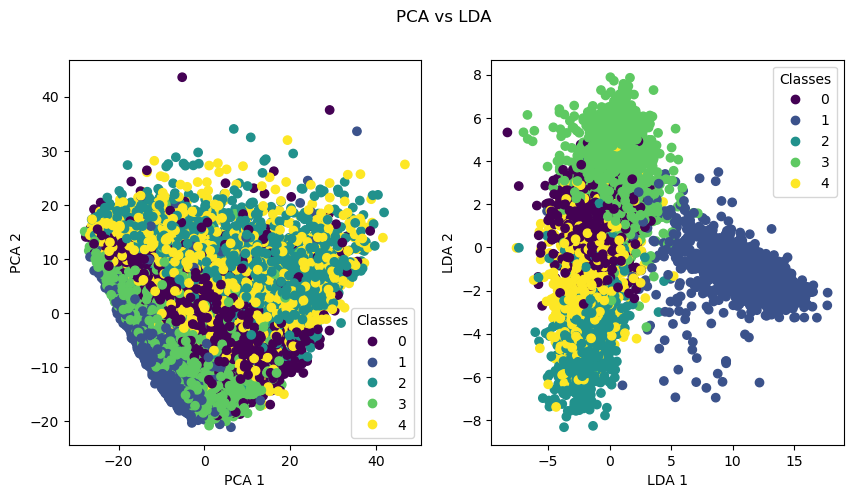

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

scatter1 = ax[0].scatter(PCA_X_train[:,0], PCA_X_train[:,1], c=y_train)
scatter2 = ax[1].scatter(LDA_X_train[:,0], LDA_X_train[:,1], c=y_train)
ax[0].legend(*scatter1.legend_elements(), title="Classes")
ax[1].legend(*scatter2.legend_elements(), title='Classes')
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")
ax[1].set_xlabel("LDA 1")
ax[1].set_ylabel("LDA 2")
fig.suptitle("PCA vs LDA");


In [25]:
svm_PCA1 = SVC(kernel='rbf', C=1, gamma=0.01)
svm_PCA1.fit(PCA_X_train[:,:2], y_train)
PCA1_y_pred = svm_PCA1.predict(PCA_X_test[:,:2])

svm_LDA1 = SVC(kernel='rbf', C=1, gamma=0.01)
svm_LDA1.fit(LDA_X_train[:,:2], y_train)
LDA1_y_pred = svm_LDA1.predict(LDA_X_test[:,:2])

svm_PCA2 = SVC(kernel='rbf', C=1, gamma=0.01)
svm_PCA2.fit(PCA_X_train, y_train)
PCA2_y_pred = svm_PCA2.predict(PCA_X_test)

svm_LDA2 = SVC(kernel='rbf', C=1, gamma=0.01)
svm_LDA2.fit(LDA_X_train, y_train)
LDA2_y_pred = svm_LDA2.predict(LDA_X_test)


print("SVM on PCA, 2 dim:", f1_score(y_test, PCA1_y_pred, average="macro"))
print("SVM on LDA, 2 dim:", f1_score(y_test, LDA1_y_pred, average="macro"))
print("SVM on PCA, 6 dim:", f1_score(y_test, PCA2_y_pred, average="macro"))
print("SVM on LDA, 4 dim:", f1_score(y_test, LDA2_y_pred, average="macro"))


SVM on PCA, 2 dim: 0.5730035926693218
SVM on LDA, 2 dim: 0.7261501329609381
SVM on PCA, all dim: 0.7796665653640624
SVM on LDA, all dim: 0.81630391600527


In [23]:
nb_PCA1 = NB_clf(0.6)
nb_PCA1.fit(PCA_X_train[:,:2], y_train)
NB_PCA1_y_pred = nb_PCA1.predict(PCA_X_test[:,:2])

nb_LDA1 = NB_clf(0.6)
nb_LDA1.fit(LDA_X_train[:,:2], y_train)
NB_LDA1_y_pred = nb_LDA1.predict(LDA_X_test[:,:2])

nb_PCA2 = NB_clf(0.6)
nb_PCA2.fit(PCA_X_train[:,:], y_train)
NB_PCA2_y_pred = nb_PCA2.predict(PCA_X_test[:,:])

nb_LDA2 = NB_clf(0.6)
nb_LDA2.fit(LDA_X_train[:,:], y_train)
NB_LDA2_y_pred = nb_LDA2.predict(LDA_X_test[:,:])

print("NB on PCA, 2 dim:", f1_score(y_test, NB_PCA1_y_pred, average="macro"))
print("NB on LDA, 2 dim:", f1_score(y_test, NB_LDA1_y_pred, average="macro"))
print("NB on PCA, 6 dim:", f1_score(y_test, NB_PCA2_y_pred, average="macro"))
print("NB on LDA, 4 dim:", f1_score(y_test, NB_LDA2_y_pred, average="macro"))

NB on PCA, 2 dim: 0.5076282530197032
NB on LDA, 2 dim: 0.7167324243145808
NB on PCA, 6 dim: 0.6977798363403879
NB on LDA, 4 dim: 0.7998845700556109


In [25]:
svm_all = SVC(kernel='rbf', gamma=0.01, C=1)
svm_all.fit(X_train, y_train)
preds_all = svm_all.predict(X_test)

f1_score(y_test, preds_all, average="macro")



0.06666666666666668